In [1]:
import gzip
import json
import random

In [2]:
def load_prism_data_from_jsonl_gz_file(file_path: str) -> list[dict[str, int]]:
    """
    load a GZ-encoded jsonl file, and extract samples with their corresponding labels
    Parameters:
        - file_path: file path to the GZ-encoded jsonl-file
    Returns:
        - array containing samples with their corresponding labels
    """
    samples = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for line in file:
            sample = json.loads(line)
            samples.append({"text": sample["text"], "label": sample["label"]})
    print(f"Samples for {file_path}: {len(samples)}")
    return samples

In [3]:
def create_balanced_category_samples(human_path: str, ai_path_gpt: str, ai_path_gemma: str, n_total: int) -> list[dict[str, int]]:
    """
    Create a balanced sample list of size `n_total` with equal human and AI samples.
    Parameters:
        - human_path: file path to the GZ-encoded jsonl-file with human samples
        - ai_path: file path to the GZ-encoded jsonl-file with ai samples
        - n_total: how many examples per file
    Returns:
        - array containing samples with their corresponding labels
    """
    human_samples = load_prism_data_from_jsonl_gz_file(human_path)
    ai_samples = load_prism_data_from_jsonl_gz_file(ai_path_gpt) + load_prism_data_from_jsonl_gz_file(ai_path_gemma)

    #n_per_class = n_total // 2
    #human_samples = random.sample(human_samples, min(n_per_class, len(human_samples)))
    #ai_samples = random.sample(ai_samples, min(n_per_class, len(ai_samples)))

    combined = human_samples + ai_samples
    random.shuffle(combined)
    return combined

In [4]:
samples_per_category = 7000

In [5]:
categories = {
    "arxiv": ("arxiv/human.jsonl.gz", "arxiv/gpt_4o_mini.jsonl.gz", "arxiv/gemma2_9b.jsonl.gz"),
    "blog_authorship_corpus": ("blog_authorship_corpus/human.jsonl.gz", "blog_authorship_corpus/gpt_4o_mini.jsonl.gz", "blog_authorship_corpus/gemma2_9b.jsonl.gz"),
    "bundestag": ("bundestag/human.jsonl.gz", "bundestag/gpt_4o_mini.jsonl.gz", "bundestag/gemma2_9b.jsonl.gz"),
    "cnn": ("cnn/human.jsonl.gz", "cnn/gpt_4o_mini.jsonl.gz", "cnn/gemma2_9b.jsonl.gz"),
    "euro_court": ("euro_court/human.jsonl.gz", "euro_court/gpt_4o_mini.jsonl.gz", "euro_court/gemma2_9b.jsonl.gz"),
    "gutenberg_de": ("gutenberg_de/human.jsonl.gz", "gutenberg_de/gpt_4o_mini.jsonl.gz", "gutenberg_de/gemma2_9b.jsonl.gz"),
    "gutenberg_en": ("gutenberg_en/human.jsonl.gz", "gutenberg_en/gpt_4o_mini.jsonl.gz", "gutenberg_en/gemma2_9b.jsonl.gz"),
    "house_of_commons": ("house_of_commons/human.jsonl.gz", "house_of_commons/gpt_4o_mini.jsonl.gz", "house_of_commons/gemma2_9b.jsonl.gz"),
    "spiegel": ("spiegel/human.jsonl.gz", "spiegel/gpt_4o_mini.jsonl.gz", "spiegel/gemma2_9b.jsonl.gz"),
    "student_essays": ("student_essays/human.jsonl.gz", "student_essays/gpt_4o_mini.jsonl.gz", "student_essays/gemma2_9b.jsonl.gz")
}

In [6]:
all_category_samples = {}

In [7]:
# Für Reproduzierbarkeit
random.seed(42)

In [8]:
for category, (human_path, ai_path_gpt, ai_path_gemma) in categories.items():
    samples = create_balanced_category_samples(human_path, ai_path_gpt, ai_path_gemma, samples_per_category)
    all_category_samples[category] = samples
    print(f"{category} samples collected: {len(samples)}")

Samples for arxiv/human.jsonl.gz: 8448
Samples for arxiv/gpt_4o_mini.jsonl.gz: 7173
Samples for arxiv/gemma2_9b.jsonl.gz: 7780
arxiv samples collected: 23401
Samples for blog_authorship_corpus/human.jsonl.gz: 18614
Samples for blog_authorship_corpus/gpt_4o_mini.jsonl.gz: 4576
Samples for blog_authorship_corpus/gemma2_9b.jsonl.gz: 14674
blog_authorship_corpus samples collected: 37864
Samples for bundestag/human.jsonl.gz: 18323
Samples for bundestag/gpt_4o_mini.jsonl.gz: 10057
Samples for bundestag/gemma2_9b.jsonl.gz: 13403
bundestag samples collected: 41783
Samples for cnn/human.jsonl.gz: 18773
Samples for cnn/gpt_4o_mini.jsonl.gz: 11814
Samples for cnn/gemma2_9b.jsonl.gz: 13799
cnn samples collected: 44386
Samples for euro_court/human.jsonl.gz: 9148
Samples for euro_court/gpt_4o_mini.jsonl.gz: 3761
Samples for euro_court/gemma2_9b.jsonl.gz: 8909
euro_court samples collected: 21818
Samples for gutenberg_de/human.jsonl.gz: 372
Samples for gutenberg_de/gpt_4o_mini.jsonl.gz: 100
Samples fo

In [9]:
all_samples = []
for samples in all_category_samples.values():
    all_samples.extend(samples)
print(f"Total collected samples across all categories: {len(all_samples)}")

Total collected samples across all categories: 354738


In [10]:
random.shuffle(all_samples)

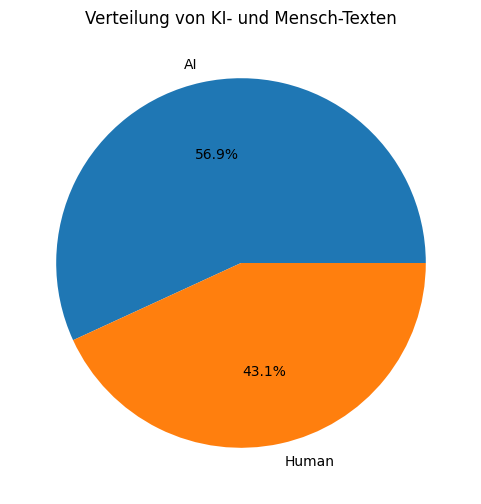

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

labels = [example['label'] for example in all_samples]
label_counts = Counter(labels)

label_names = {0: 'Human', 1: 'AI'}
counts_named = {label_names[k]: v for k, v in label_counts.items()}

# Kreisdiagramm zeichnen
plt.figure(figsize=(6, 6))
plt.pie(counts_named.values(), labels=counts_named.keys(), autopct='%1.1f%%')
plt.title('Verteilung von KI- und Mensch-Texten')
plt.show()

In [12]:
def save_samples_to_jsonl(samples: list[dict[str, int]], output_path: str):
    """
    Save list of samples to a .jsonl file.
    Parameters:
        - samples: to be saved
        - output_path: file path where the file should be saved
    Returns:
        - none
    """
    with open(output_path, 'w', encoding='utf-8') as f:
        for sample in samples:
            json.dump(sample, f, ensure_ascii=False)
            f.write('\n')

In [13]:
save_samples_to_jsonl(all_samples, "dataset.jsonl")

In [14]:
test = []
with open("dataset.jsonl", 'r', encoding='utf-8') as f:
    for line in f:
        test.append(json.loads(line))

print(len(test))

354738


In [15]:
all_samples[16_000]

{'text': 'Hey there! So, let’s talk about online learning and why it’s super awesome for students who can’t make it to a regular school. I mean, life gets in the way sometimes, right? Like, maybe you’ve got a job or kids to take care of. That’s where online education comes in handy! First off, online classes let you learn from anywhere. You can be in your pajamas, sipping coffee, and still get your education. No need to rush to class or deal with traffic. Plus, you can learn at your own pace. If you need to take a break or go back to something you didn’t get, you can totally do that! It’s like having a pause button on your learning. Also, online learning often offers a ton of resources. You can find videos, articles, and forums to help you out. And let’s not forget the flexibility! You can fit your studies around your life, which is a big deal for busy folks. In conclusion, online education is a lifesaver for those juggling work, family, and school. So, if you’re in that boat, give it 

In [16]:
test[15_000]

{'text': 'Auf einer Bank in Greater London ist laut dem britischen Sender BBC eine Plakette auf einer Bank angebracht worden. Soweit ist das nichts Ungewöhnliches, doch Empörung löste die Inschrift auf dem Metall aus, die offenbar den ehemaligen irakischen Despoten ehrte: "In Loving Memory of Saddam Hussein" (dt. "In liebevoller Erinnerung an Saddam Hussein") soll dort zu lesen gewesen sein. Das berichtet eine Anwohnerin. Victoria Richards wohnt im Vorstadtbezirk Wanstead und veröffentlichte das Foto der Plakette auf Twitter. Es wurde tausendfach geteilt und Hunderte Male kommentiert. Der BBC sagte Richards, dass die Empörung in ihrer Nachbarschaft sehr groß gewesen sei, vor allem in der irakischen Gemeinde: "Die Menschen nannten das einen kranken Scherz." Die Reaktionen in den sozialen Medien waren dem Sender zufolge gemischt: Während einige die Aktion als witzig einstuften, reagierten andere schockiert. Wiederum andere stellten die Theorie auf, dass die Plakette einer anderen Person,